In [1]:
import numpy as np
import pandas as pd
import scipy
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Using matplotlib backend: MacOSX


In [2]:
directory = "/Users/Vivek/GoogleDrive/Spring17/Data_Mining/project/TalkData"
gatrain = pd.read_csv(os.path.join(directory, 'gender_age_train.csv'))
gatest = pd.read_csv(os.path.join(directory, 'gender_age_test.csv'))
aevents = pd.read_csv(os.path.join(directory, 'app_events.csv'))
alabels = pd.read_csv(os.path.join(directory, 'app_labels.csv'))
labcat = pd.read_csv(os.path.join(directory,'label_categories.csv'))
events = pd.read_csv(os.path.join(directory, 'events.csv'))
phone = pd.read_csv(os.path.join(directory, 'phone_brand_device_model.csv'))

In [3]:
print('Gender Age Train: gatrain')
gatrain.head()
print("----------------------------")

print('Gender Age Test: gatest')
gatest.head()
print("----------------------------")

print('App Events: aevents')
aevents.head()
print("----------------------------")

print('App Labels: alabels')
alabels.head()
print("----------------------------")

print('Label Categories:labcat')
labcat.head()
print("----------------------------")

print('Events: events')
events.head()
print("----------------------------")

print('Phone Brand Device Model: phone')
phone.head()

Gender Age Train: gatrain


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


----------------------------
Gender Age Test: gatest


,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


----------------------------
App Events: aevents


,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


----------------------------
App Labels: alabels


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


----------------------------
Label Categories:labcat


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


----------------------------
Events: events


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


----------------------------
Phone Brand Device Model: phone


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [4]:
# aevents = pd.read_csv(os.path.join(directory,'app_events.csv'), dtype = {'is_active':bool})
# events = pd.read_csv(os.path.join(directory, 'events.csv'), parse_dates=["timestamp"])
# print("aevents")
# aevents.head()
# print("evants")
# events.head()

In [7]:
print('Gender Age Train: gatrain')
gatrain.head()

print('Total no of device id: \n', len(gatrain.device_id))
print("----------------------------")
print('No of Unique device id: \n', len(np.unique(gatrain.device_id)))
print("----------------------------")
print('Unique Groups: \n',np.unique(gatrain['group']))
#np.unique(gatrain['age'])
#np.unique(gatrain['device_id'])
print("----------------------------")
print('Members in various group: \n', gatrain.group.value_counts())
print("----------------------------")
print('Members in different gender: \n', gatrain.gender.value_counts())
#gatrain.age.value_counts()

# df1 = pd.DataFrame(gatrain['group'].value_counts())
# plt1 = df1.plot(kind = 'bar', alpha = 0.8)

# # df2 = pd.DataFrame(gatrain['age'].value_counts())
# # plt2 = df2.plot(kind = 'bar', alpha = 0.5)

# df3 = pd.DataFrame(gatrain['gender'].value_counts())
# plt3 = df3.plot(kind = 'bar', alpha = 0.5)
# plt4 = df1.plot(kind = 'hist')

Gender Age Train: gatrain


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


Total no of device id: 
 74645
----------------------------
No of Unique device id: 
 74645
----------------------------
Unique Groups: 
 ['F23-' 'F24-26' 'F27-28' 'F29-32' 'F33-42' 'F43+' 'M22-' 'M23-26' 'M27-28'
 'M29-31' 'M32-38' 'M39+']
----------------------------
Members in various group: 
 M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64
----------------------------
Members in different gender: 
 M    47904
F    26741
Name: gender, dtype: int64


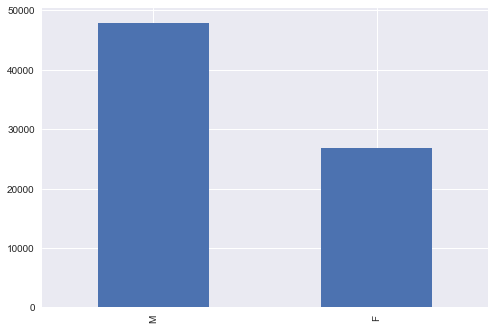

In [13]:
#gatrain[gatrain['gender'] == 'M']
gatrain['gender'].value_counts().plot.bar()

Distribution of age of mobile users


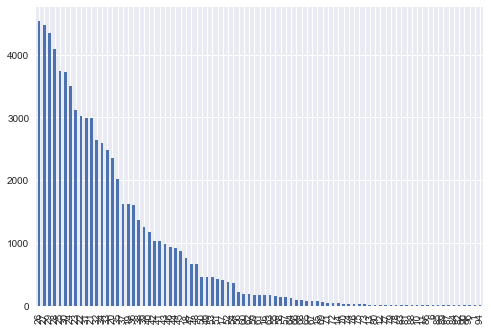

In [19]:
print("Distribution of age of mobile users")
gatrain['age'].value_counts().plot.bar()


Distribution of age of Female mobile users


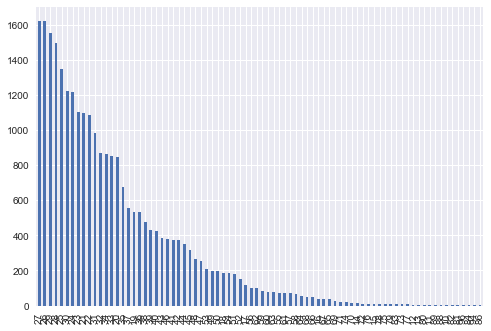

In [22]:
print("Distribution of age of Female mobile users")
gatrain[gatrain['gender']=='F']['age'].value_counts().plot.bar()



Distribution of age of Male mobile users


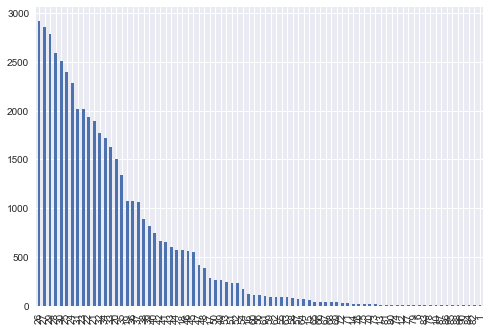

In [23]:
print("Distribution of age of Male mobile users")
gatrain[gatrain['gender']=='M']['age'].value_counts().plot.bar()


Distribution of age of mobile users


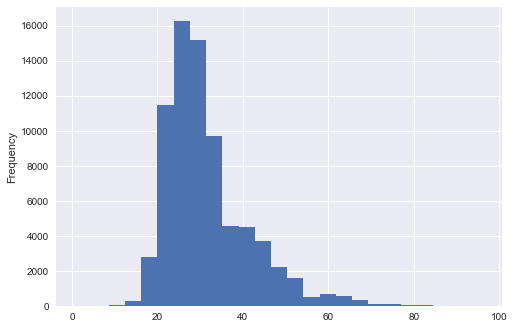

In [27]:

print("Histograme of age of mobile users")
gatrain['age'].plot.hist(bins = 25)


(array([  1.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          1.20000000e+01,   8.60000000e+01,   9.80000000e+02,
          4.47200000e+03,   6.22800000e+03,   8.16300000e+03,
          7.88700000e+03,   5.41300000e+03,   4.13000000e+03,
          2.76200000e+03,   2.05400000e+03,   1.72900000e+03,
          1.35300000e+03,   7.62000000e+02,   6.42000000e+02,
          2.68000000e+02,   2.78000000e+02,   2.72000000e+02,
          1.42000000e+02,   1.04000000e+02,   6.10000000e+01,
          3.40000000e+01,   2.60000000e+01,   2.30000000e+01,
          6.00000000e+00,   9.00000000e+00,   3.00000000e+00]),
 array([  1.        ,   3.96666667,   6.93333333,   9.9       ,
         12.86666667,  15.83333333,  18.8       ,  21.76666667,
         24.73333333,  27.7       ,  30.66666667,  33.63333333,
         36.6       ,  39.56666667,  42.53333333,  45.5       ,
         48.46666667,  51.43333333,  54.4       ,  57.36666667,
         60.33333333,  63.3       ,  66.26666667,  69.2333

(array([  1.10000000e+01,   2.90000000e+01,   3.41000000e+02,
          2.48300000e+03,   3.40600000e+03,   4.59300000e+03,
          4.27300000e+03,   1.85000000e+03,   2.39400000e+03,
          1.56400000e+03,   1.23100000e+03,   1.10700000e+03,
          9.50000000e+02,   6.60000000e+02,   3.35000000e+02,
          4.66000000e+02,   2.40000000e+02,   2.33000000e+02,
          2.31000000e+02,   1.24000000e+02,   9.40000000e+01,
          4.10000000e+01,   2.70000000e+01,   2.60000000e+01,
          1.40000000e+01,   9.00000000e+00,   1.00000000e+00,
          6.00000000e+00,   0.00000000e+00,   2.00000000e+00]),
 array([ 10.        ,  12.86666667,  15.73333333,  18.6       ,
         21.46666667,  24.33333333,  27.2       ,  30.06666667,
         32.93333333,  35.8       ,  38.66666667,  41.53333333,
         44.4       ,  47.26666667,  50.13333333,  53.        ,
         55.86666667,  58.73333333,  61.6       ,  64.46666667,
         67.33333333,  70.2       ,  73.06666667,  75.9333

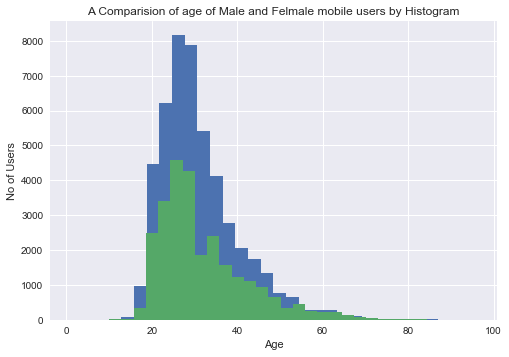

In [42]:
plt.title("A Comparision of age of Male and Felmale mobile users by Histogram")
plt.ylabel("No of Users")
plt.xlabel ("Age")
plt.hist(gatrain[gatrain['gender']=='M']['age'],bins = 30, label="Male")
plt.hist(gatrain[gatrain['gender']=='F']['age'],bins = 30, label="Female")
plt.show()
#gatrain[gatrain['gender']=='M']['age'].plot.hist(bins = 25) # THis is panda method
#gatrain[gatrain['gender']=='F']['age'].plot.hist(bins = 25)# plt.labels won't work
#plt.legend("Male", "Female")


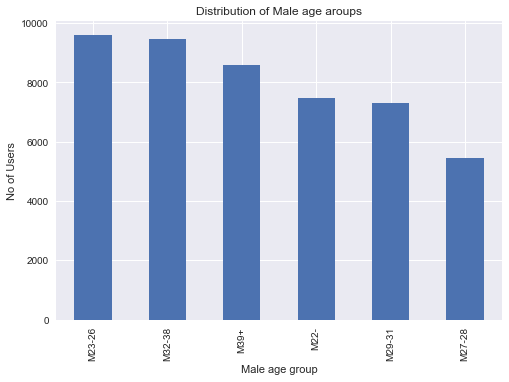

In [56]:
plt.title("Distribution of Male age aroups")
plt.xlabel('Male age group')
plt.ylabel('No of Users')
gatrain[gatrain['gender'] =='M']['group'].value_counts().plot.bar()

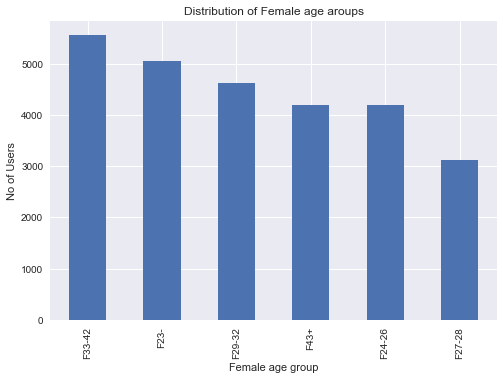

In [55]:
plt.title("Distribution of Female age aroups")
plt.xlabel('Female age group')
plt.ylabel('No of Users')
gatrain[gatrain['gender'] =='F']['group'].value_counts().plot.bar()
plt.show()

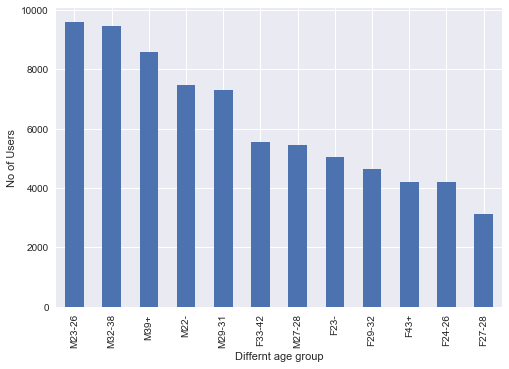

In [57]:
plt.xlabel('Differnt age group')
plt.ylabel('No of Users')
gatrain['group'].value_counts().plot.bar()

In [61]:
gatest.head()
len(gatest.device_id)
len(np.unique(gatest.device_id))

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


112071

112071

In [62]:
aevents.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [64]:
print('No of Unique events: \n',len(np.unique(aevents.event_id)) )# NO of unique events
print("-------------------------------------")
print('No of unique apps: \n', len(np.unique(aevents.app_id)))
print("-------------------------------------")

print('Total no of events: \n', len(aevents.event_id))
print("-------------------------------------")

#print('all the apps are installed: \n', aevents.is_installed.value_counts())
print('Active apps when event occured: \n',aevents.is_active.value_counts())
print("-------------------------------------")

print('Ratio of active app: \n', (len(aevents[aevents.is_active == 1]))/(len(aevents.is_active)))
print("-------------------------------------")


No of Unique events: 
 1488096
-------------------------------------
No of unique apps: 
 19237
-------------------------------------
Total no of events: 
 32473067
-------------------------------------
Active apps when event occured: 
 0    19740071
1    12732996
Name: is_active, dtype: int64
-------------------------------------
Ratio of active app: 
 0.3921094364138749
-------------------------------------


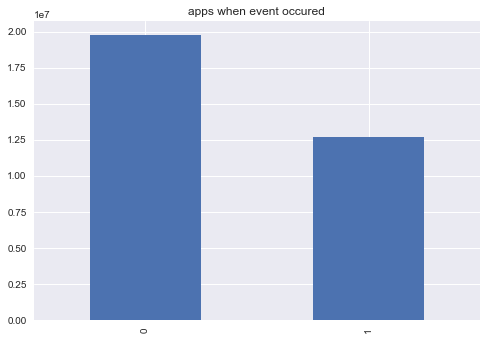

In [69]:
aevents['is_active'].value_counts().plot(kind = 'bar', title = "apps when event occured")

In [72]:
# Each events have few distinct app installed and few of them are active when event occured
## DataFrame where apps are active when event occured
#aevents = aevents.loc[aevents.is_active ==1] #aevents = aevents(aevents.is_active ==1)
#len(aevents)
aevents['app_id'].value_counts().head()#.plot(kind = 'bar', title = "apps when event occured")

8693964245073640147    1151391
5927333115845830913     898788
4348659952760821294     795995
628020936226491308      620659
3433289601737013244     373186
Name: app_id, dtype: int64

In [73]:
alabels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


Total no of app_id


459943

------------------------
No of Unique app_id


113211

------------------------
No of Unique app labels


507

------------------------
we can see that 507 apps labels are there for 113211 distinct add_id


___________________________
we plotted 100 most installed app labels; A clear pattern that few apps are used much more than others


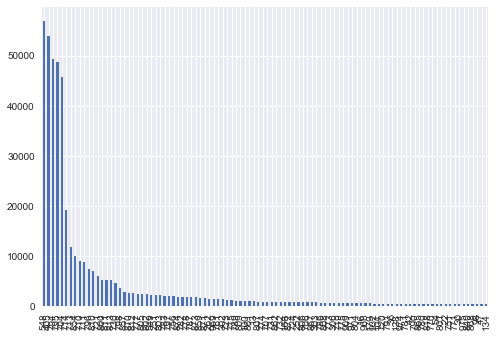

In [87]:
print("Total no of app_id")
len(alabels.app_id)
print("------------------------")
print("No of Unique app_id")
len(np.unique(alabels.app_id))
print("------------------------")
print("No of Unique app labels")
len(np.unique(alabels.label_id))
print("------------------------")
print('we can see that 507 apps labels are there for 113211 distinct add_id')
alabels['label_id'].value_counts()[:100].plot(kind = 'bar')
print("___________________________")
print("we plotted 100 most installed app labels; A clear pattern that few apps are used much more than others")


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


__________________________---


__________________________---
we just print top 100 app labels
few app category have large no of apps, few has few


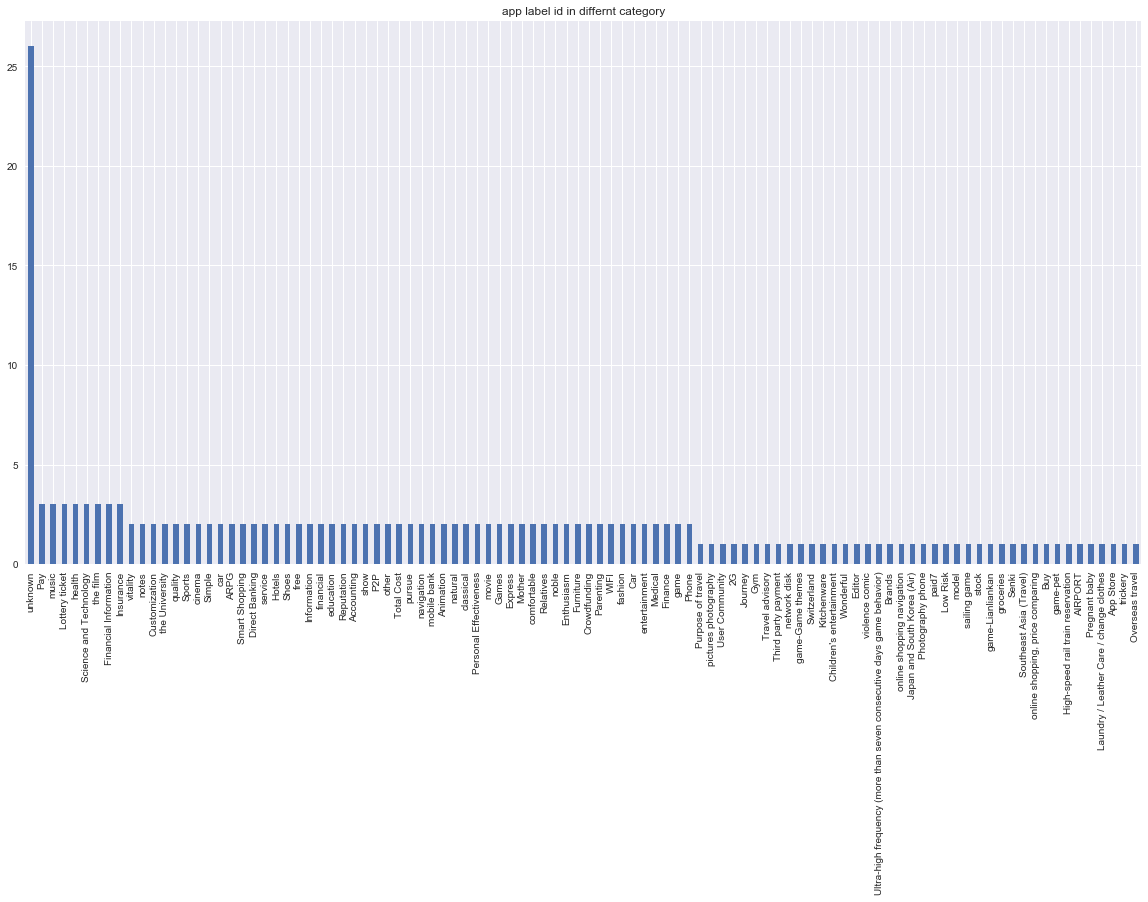

In [98]:
labcat.head()
print('__________________________---')
plt.figure(figsize=(20,10))
labcat['category'].value_counts()[:100].plot(kind = 'bar',title = 'app label id in differnt category')
print('__________________________---')
print('we just print top 100 app labels')
print("few app category have large no of apps, few has few")

In [100]:
events.head()


,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [102]:
print('totol no of event id')
len(events.event_id) # events id are unique as same no of event id above
print('------------------------')
print('unique event id')
len(np.unique(events.event_id))
print('----------------------------')
print('all the event id are unique: primany key in this table')
print('--------------------------')
print("No of Unique Device_id: we can see One device active for many events")
len(np.unique(events.device_id))


totol no of event id


3252950

------------------------
unique event id


3252950

----------------------------
all the event id are unique: primany key in this table
--------------------------
No of Unique Device_id: we can see One device active for many events


60865

In [103]:
phone.head()
len(phone.device_id)
len(np.unique(phone.device_id))
len(phone.phone_brand)
len(np.unique(phone.phone_brand))
len(phone.device_model)
len(np.unique(phone.device_model))

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


187245

186716

187245

131

187245

1599

Few brands are very famous than others


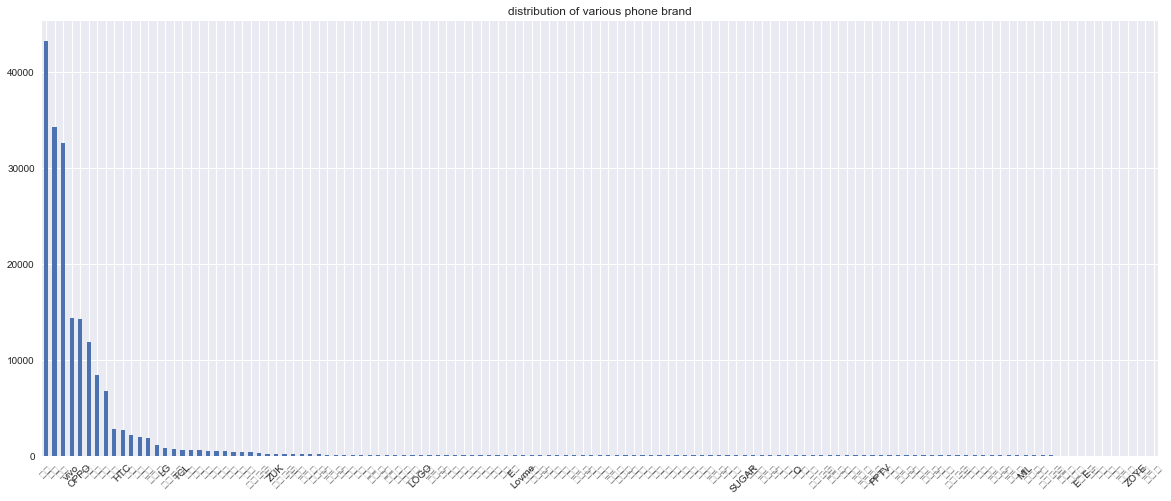

In [109]:
plt.figure(figsize = (20,8))

phone['phone_brand'].value_counts().plot(kind = 'bar', rot = 45, title = "distribution of various phone brand")
print('Few brands are very famous than others')